In [4]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

py.init_notebook_mode(connected=True)

In [8]:
X_train = pd.read_csv("2_Output/2_test_train_encoded/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/2_test_train_encoded/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/2_test_train_encoded/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/2_test_train_encoded/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [7]:
X_train.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,12541,18,0,49,4,950,1,0,1,0
1,33964,58,2,3,12,879,1,0,1,0
2,7727,10,14,39,6,751,1,1,0,0
3,22162,23,6,9,7,788,1,0,0,1
4,35052,88,20,4,23,571,0,0,0,1


In [9]:
X_train_3 = X_train
X_train_3

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,12541,18,0,49,4,950,1,0,1,0
1,33964,58,2,3,12,879,1,0,1,0
2,7727,10,14,39,6,751,1,1,0,0
3,22162,23,6,9,7,788,1,0,0,1
4,35052,88,20,4,23,571,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
289,9666,15,14,10,14,356,1,1,0,0
290,17812,14,4,19,12,38,0,0,1,0
291,14257,18,10,1,7,316,1,0,0,1
292,46496,114,4,0,12,332,0,0,0,1


In [10]:
X_train_3.dtypes

Population              int64
KSI                     int64
TotalYouthServices      int64
CommunityHousing        int64
PlacesOfWorship         int64
SocialHousing           int64
TPSFacilities_2km_TF    int64
TOD_Afternoon           int64
TOD_Morning             int64
TOD_Night               int64
dtype: object

In [11]:
X_test_3 = X_test
X_test_3.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,65913,185,41,26,3,2644,1,0,0,1
1,17992,30,4,2,12,1036,0,0,1,0
2,21567,24,2,26,10,151,1,0,0,1
3,21381,35,9,48,16,1016,0,1,0,0
4,26984,91,13,8,16,422,1,1,0,0


In [12]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, r2_score
from numpy import percentile
from scipy import stats
import statsmodels.api as sm

In [61]:
def linReg (X_train,y_train,X_test, y_test):

# intantiate and fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    #print("Intercept:",lr.intercept_)
    coeff = lr.coef_
    
    # making predictions
    y_pred_test = lr.predict(X_test)
    
    # metrics of performance
    mse_ = mean_squared_error(y_test, y_pred_test)
    r2_ = r2_score(y_test, y_pred_test)
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # print mse, r2
    print("MSE = ", mse_)
    #print("R2 = ", r2_)
    print('Mean Absolute Error', mae)
    
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    coef_table.insert(len(coef_table.columns),"Coefs",coeff.transpose())
  
    # Print Coefficient table
    params = np.append(lr.intercept_,lr.coef_)
    
    newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))

    var_b = mse_*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(newX.shape[0]- newX.shape[1]))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    features = ["Intercept","Population","KSI", "TotalYouthServices", "CommunityHousing", "PlacesOfWorship", "SocialHousing",\
               'TPSFacilities_2km_TF','TOD_Afternoon','TOD_Morning','TOD_Night']
    
    myDF3 = pd.DataFrame()
    myDF3["bias"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [features,params,sd_b,ts_b,p_values]
    print(myDF3)  
    
    print("============================================")

  


    
      
    #Errors
    diff = (y_test - y_pred_test)

    
    # Plot histogram and adjust style
    plt.hist(diff, edgecolor='black', linewidth=1.2)
    plt.title("Errors Histogram")
    
    # identify outliers with interquartile range
    data = diff
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    print("============================================")
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in np.array(data) if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in np.array(data) if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("============================================")
    
    
    # give me the coefficients and intercept
    coefficients_ = lr.coef_
    intercept_ = lr.intercept_
    
    #print("Coefficients = ", coefficients_)
    #print("Bias = ", intercept_)
 

    print('Predictions', y_pred_test)
    print("Errors",diff)
    
    print("============================================")
    # KFold cross_validate
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    # Kfold CV
    kf = KFold(n_splits=10, shuffle=True, random_state=24)
    cval_score = cross_validate(lr,X_train, y_train, cv=kf,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score['train_r2'])
    print('10-KFold folds:',kf)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score['test_neg_mean_squared_error'])), cval_score['test_neg_mean_squared_error'])
    plt.title('10-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score['test_neg_mean_squared_error']) + 1), \
             [cval_score['test_neg_mean_squared_error'].mean()] * (len(cval_score['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    kf5 = KFold(n_splits=5, shuffle=True, random_state=24)
    cval_score5 = cross_validate(lr,X_train, y_train, cv=kf5,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score5['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score5['train_r2'])
    print('5-Fold folds:',kf5)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score5['test_neg_mean_squared_error'])), cval_score5['test_neg_mean_squared_error'])
    plt.title('5-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score5['test_neg_mean_squared_error']) + 1), \
             [cval_score5['test_neg_mean_squared_error'].mean()] * (len(cval_score5['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_test, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    #plt.tight_layout()
   

    

    
    return


MSE =  51857.26326652869
Mean Absolute Error 97.04508602248322
                    bias  Coefficients  Standard Errors  t values  \
0              Intercept       -8.2405              NaN       NaN   
1             Population        0.0034            0.002     1.586   
2                    KSI        1.1344            0.721     1.574   
3     TotalYouthServices       10.9166            1.583     6.897   
4       CommunityHousing       -0.0626            0.552    -0.113   
5        PlacesOfWorship       -0.0709            2.307    -0.031   
6          SocialHousing        0.0654            0.030     2.157   
7   TPSFacilities_2km_TF       10.0066           28.399     0.352   
8          TOD_Afternoon       20.1697              NaN       NaN   
9            TOD_Morning      -71.1751              NaN       NaN   
10             TOD_Night       51.0054              NaN       NaN   

    Probabilities  
0             NaN  
1           0.114  
2           0.117  
3           0.000  
4       

C:\Users\maris\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning:

invalid value encountered in greater_equal



Percentiles: 25th=-52.515, 75th=67.895, IQR=120.409
Identified outliers: 5
Non-outlier observations: 121
Predictions [[1108.53459363]
 [ 127.08165484]
 [ 183.74202262]
 [ 285.89910311]
 [ 386.09336779]
 [ 321.12330565]
 [  97.22779401]
 [  41.95261801]
 [  89.9707699 ]
 [  96.77253708]
 [ -28.67754915]
 [ 103.77313757]
 [ 341.91437125]
 [ 234.52515723]
 [ 281.7232809 ]
 [ 294.30699245]
 [ 573.35143841]
 [ 390.66506983]
 [ 437.3512379 ]
 [ 126.2817397 ]
 [ 395.53462992]
 [ 462.33575308]
 [ 242.03888573]
 [ 181.05334263]
 [ 449.80314974]
 [ 289.8248197 ]
 [ 272.87460681]
 [ 456.11408645]
 [ 312.55900198]
 [ 276.13211414]
 [ 211.29626496]
 [ 163.12963986]
 [ 462.55260607]
 [ 118.46046335]
 [ 925.22347355]
 [ 116.62644649]
 [ 256.72740017]
 [ 121.64925747]
 [ 209.8051814 ]
 [ 104.69890847]
 [ 156.63088674]
 [ 364.0430755 ]
 [ 306.59702845]
 [ 219.83252934]
 [ 304.18991187]
 [ 447.05511409]
 [ 378.18881803]
 [  82.42287931]
 [1081.68039735]
 [ 139.66390383]
 [ -26.35625265]
 [1050.84467627]

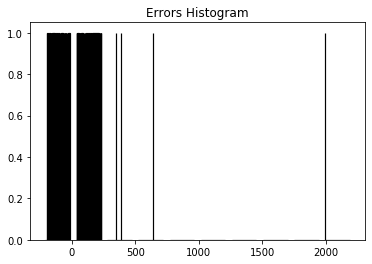

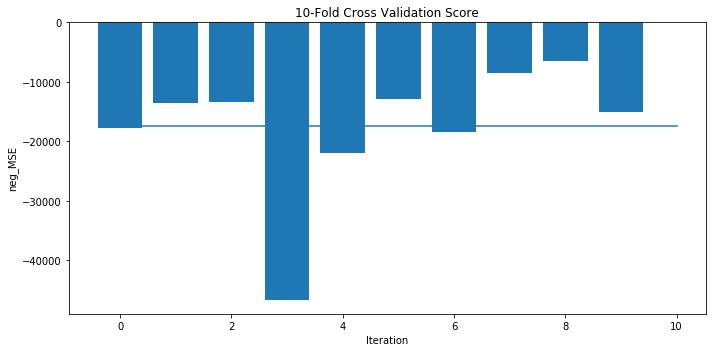

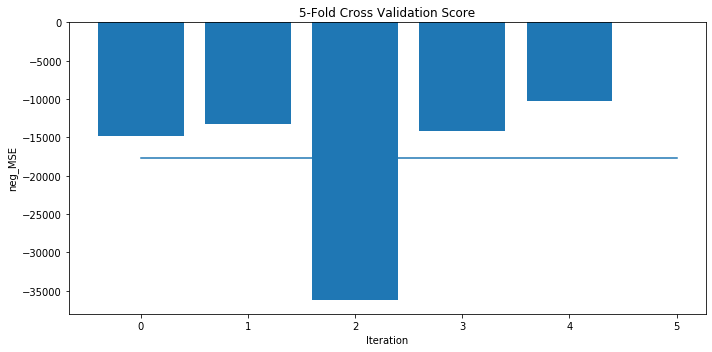

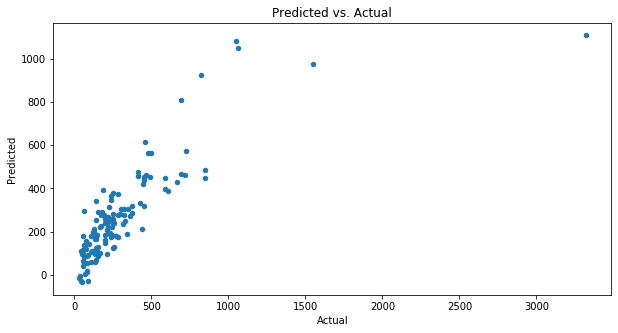

In [63]:
Assault_sklearn = linReg(X_train_3, y_train.iloc[:,[0]], X_test_3, y_test.iloc[:,[0]] )

MSE =  6336.584713897818
Mean Absolute Error 32.91974263495381
                    bias  Coefficients  Standard Errors  t values  \
0              Intercept       -1.7997              NaN       NaN   
1             Population        0.0005            0.001     0.651   
2                    KSI        0.6009            0.252     2.385   
3     TotalYouthServices       -0.3153            0.553    -0.570   
4       CommunityHousing        0.0277            0.193     0.144   
5        PlacesOfWorship        2.7347            0.806     3.392   
6          SocialHousing       -0.0035            0.011    -0.330   
7   TPSFacilities_2km_TF       -3.5786            9.927    -0.360   
8          TOD_Afternoon       -4.5972              NaN       NaN   
9            TOD_Morning      -20.9395              NaN       NaN   
10             TOD_Night       25.5367              NaN       NaN   

    Probabilities  
0             NaN  
1           0.516  
2           0.018  
3           0.569  
4       

C:\Users\maris\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning:

invalid value encountered in greater_equal



Percentiles: 25th=-22.330, 75th=15.178, IQR=37.508
Identified outliers: 6
Non-outlier observations: 120
Predictions [[150.69268954]
 [ 32.18093159]
 [ 72.1561496 ]
 [ 63.90904526]
 [ 96.45848945]
 [ 44.14819075]
 [ 46.97384118]
 [ 18.25612074]
 [ 25.8648803 ]
 [ 30.04367168]
 [ -2.58675077]
 [ 26.72616507]
 [ 40.55985675]
 [  1.41681156]
 [ 63.3171219 ]
 [ 38.78026289]
 [235.67266478]
 [ 74.12655756]
 [113.43126753]
 [ 65.8184709 ]
 [ 85.5081174 ]
 [101.24064486]
 [ 47.53302236]
 [ 42.86499392]
 [ 92.75461316]
 [ 40.4406053 ]
 [ 77.66683413]
 [ 94.1077034 ]
 [ 93.45093368]
 [ 47.89744403]
 [ 44.42039448]
 [ 56.7763115 ]
 [111.9083985 ]
 [ 76.16738089]
 [202.34843579]
 [ 49.6923642 ]
 [ 18.10660612]
 [ 48.71120371]
 [ 92.50972644]
 [ 23.11891198]
 [ 69.28683978]
 [ 13.56245184]
 [103.49991829]
 [ 82.37455445]
 [ 69.16577185]
 [ 41.10878706]
 [ 40.5695355 ]
 [  1.37136033]
 [ 96.16850785]
 [ 45.05443009]
 [  2.53897236]
 [ 66.03469608]
 [185.66307564]
 [ 16.45587693]
 [ 24.07256228]
 [ 1

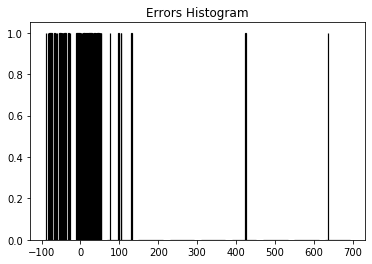

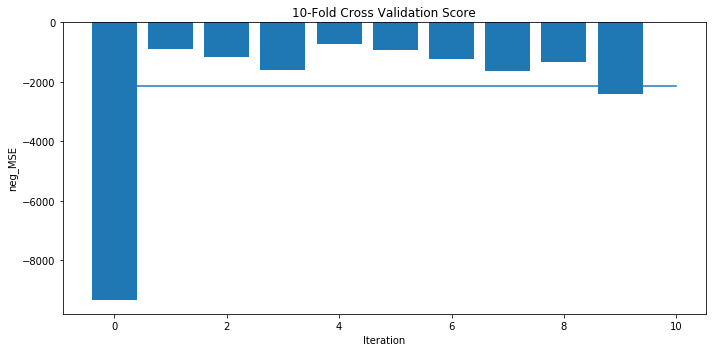

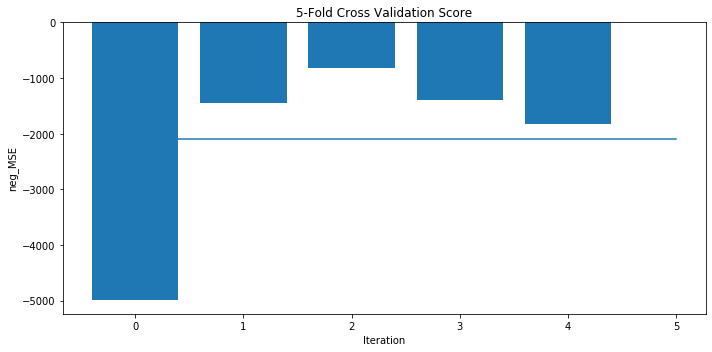

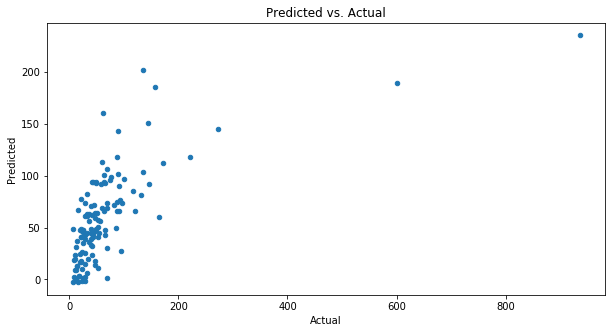

In [64]:
AutoTHeft_sklearn = linReg(X_train_3, y_train.iloc[:,[1]], X_test_3, y_test.iloc[:,[1]] )

MSE =  2744.8993717508997
Mean Absolute Error 33.02560318088923
                    bias  Coefficients  Standard Errors  t values  \
0              Intercept        5.1959              NaN       NaN   
1             Population        0.0022            0.001     4.383   
2                    KSI        0.1583            0.166     0.955   
3     TotalYouthServices        2.7948            0.364     7.675   
4       CommunityHousing       -0.4009            0.127    -3.159   
5        PlacesOfWorship        2.2594            0.531     4.257   
6          SocialHousing        0.0121            0.007     1.743   
7   TPSFacilities_2km_TF       -3.6044            6.534    -0.552   
8          TOD_Afternoon      -12.6031              NaN       NaN   
9            TOD_Morning       -1.5874              NaN       NaN   
10             TOD_Night       14.1906              NaN       NaN   

    Probabilities  
0             NaN  
1           0.000  
2           0.341  
3           0.000  
4      

C:\Users\maris\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning:

invalid value encountered in greater_equal



Percentiles: 25th=-26.677, 75th=12.186, IQR=38.863
Identified outliers: 9
Non-outlier observations: 117
Predictions [[332.64106157]
 [ 97.88081896]
 [ 86.4603258 ]
 [ 99.41421916]
 [136.95669361]
 [ 94.47753594]
 [ 90.84585924]
 [ 60.57752731]
 [ 32.49050474]
 [ 39.35918991]
 [ 34.6117715 ]
 [ 37.01514016]
 [ 97.81358137]
 [ 92.72128459]
 [ 98.94412219]
 [ 97.89878466]
 [253.98764865]
 [191.64489252]
 [125.63480044]
 [ 78.25775822]
 [146.62017341]
 [187.7475651 ]
 [ 72.26236583]
 [ 73.37196525]
 [145.17562875]
 [ 80.4791002 ]
 [ 99.05604205]
 [129.94317285]
 [125.73779841]
 [ 99.85980386]
 [ 83.48070703]
 [ 72.74980058]
 [152.27159603]
 [106.52628022]
 [333.66432233]
 [ 69.52616212]
 [ 77.55777578]
 [ 52.58438945]
 [ 95.51061467]
 [ 78.15324874]
 [ 69.45712731]
 [111.8328362 ]
 [139.07621592]
 [ 98.53430842]
 [157.63583896]
 [135.23372978]
 [ 96.22846284]
 [ 21.0707939 ]
 [290.32526012]
 [ 55.64652463]
 [ 43.79701625]
 [263.5315839 ]
 [183.46931629]
 [ 52.71405358]
 [ 71.64658995]
 [ 4

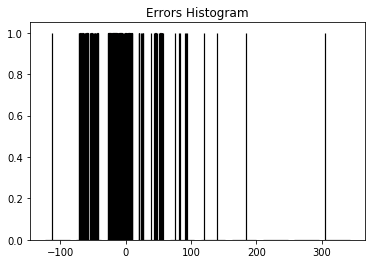

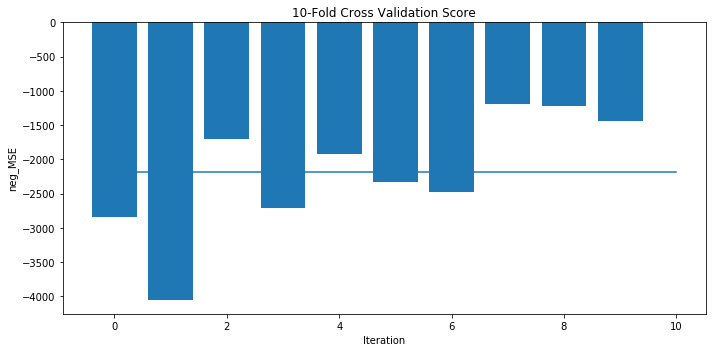

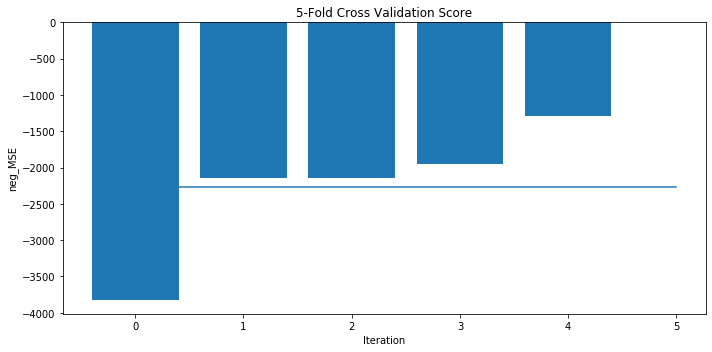

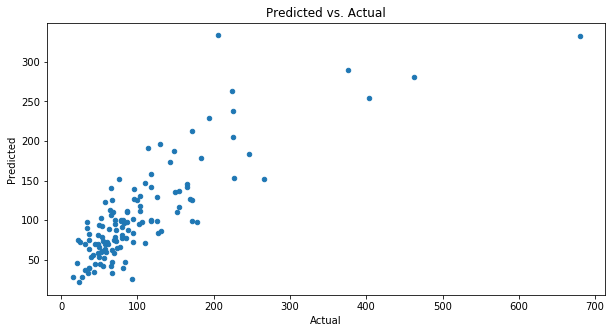

In [65]:
BreakandEnter_sklearn = linReg(X_train_3, y_train.iloc[:,[2]], X_test_3, y_test.iloc[:,[2]] )

MSE =  1845.6966094070822
Mean Absolute Error 25.66317981993538
                    bias  Coefficients  Standard Errors  t values  \
0              Intercept        1.4998              NaN       NaN   
1             Population        0.0005            0.000     1.330   
2                    KSI        0.0457            0.136     0.336   
3     TotalYouthServices        1.8243            0.299     6.110   
4       CommunityHousing        0.1097            0.104     1.054   
5        PlacesOfWorship        0.8990            0.435     2.066   
6          SocialHousing        0.0151            0.006     2.642   
7   TPSFacilities_2km_TF       -4.6705            5.358    -0.872   
8          TOD_Afternoon        5.7281              NaN       NaN   
9            TOD_Morning      -27.6789              NaN       NaN   
10             TOD_Night       21.9507              NaN       NaN   

    Probabilities  
0             NaN  
1           0.185  
2           0.737  
3           0.000  
4      

C:\Users\maris\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning:

invalid value encountered in greater_equal



Percentiles: 25th=-12.682, 75th=19.524, IQR=32.206
Identified outliers: 8
Non-outlier observations: 118
Predictions [[183.47173988]
 [ 18.95898626]
 [ 49.41583135]
 [ 71.90487822]
 [ 66.79043653]
 [ 58.78025128]
 [  6.99226662]
 [ -3.76816744]
 [ 17.25373462]
 [ 25.90806709]
 [-16.79754056]
 [ 19.16514468]
 [ 58.85630776]
 [ 32.57738766]
 [ 54.03259227]
 [ 64.61351058]
 [125.02948095]
 [ 47.87861787]
 [ 95.14506124]
 [ 42.37567361]
 [ 75.44226628]
 [ 98.98713072]
 [ 43.84536793]
 [ 38.22615772]
 [ 89.46236149]
 [ 70.00619545]
 [ 60.0679772 ]
 [ 94.93745897]
 [ 70.25520153]
 [ 58.76318875]
 [ 44.69762585]
 [ 41.49965359]
 [109.17207032]
 [ 16.11045325]
 [184.66766378]
 [ 40.68383663]
 [ 54.12026221]
 [ 24.80560333]
 [ 49.51745213]
 [  7.88138315]
 [ 51.20500801]
 [ 67.30867916]
 [ 81.72731544]
 [ 50.48405775]
 [ 42.03526741]
 [ 90.01348491]
 [ 88.55091689]
 [ 14.47653699]
 [204.72640621]
 [ 36.70680619]
 [-14.43677257]
 [188.50379694]
 [ 89.45066083]
 [ 41.83020681]
 [  1.57400825]
 [ 3

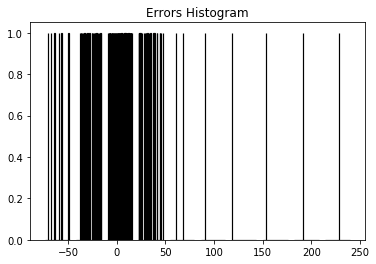

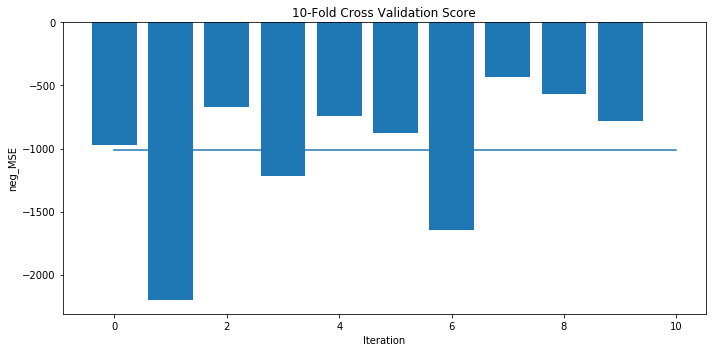

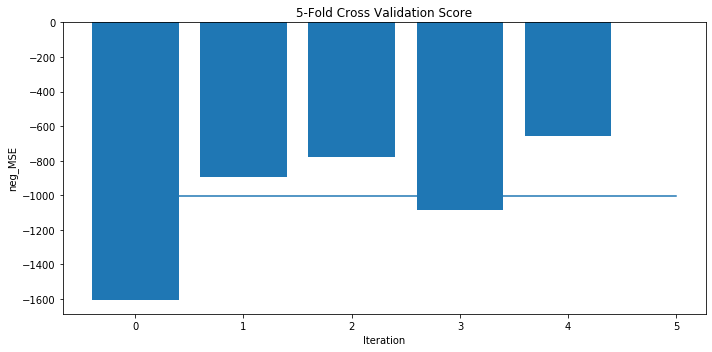

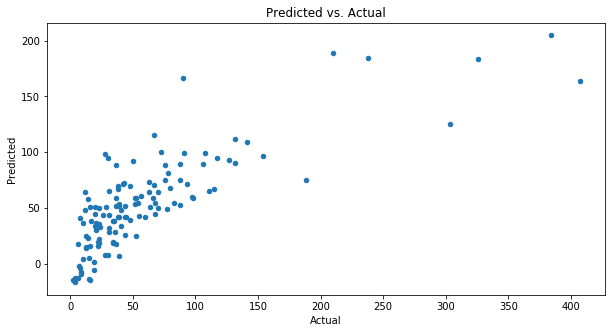

In [66]:
Robbery_sklearn = linReg(X_train_3, y_train.iloc[:,[3]], X_test_3, y_test.iloc[:,[3]] )

MSE =  201.01734378001302
Mean Absolute Error 8.456435677107889
                    bias  Coefficients  Standard Errors  t values  \
0              Intercept       -1.7989              NaN       NaN   
1             Population        0.0001            0.000     0.522   
2                    KSI        0.2247            0.045     5.007   
3     TotalYouthServices        0.8383            0.099     8.507   
4       CommunityHousing       -0.0622            0.034    -1.811   
5        PlacesOfWorship        0.0677            0.144     0.472   
6          SocialHousing       -0.0024            0.002    -1.270   
7   TPSFacilities_2km_TF        0.8818            1.768     0.499   
8          TOD_Afternoon        2.4806              NaN       NaN   
9            TOD_Morning       -2.3178              NaN       NaN   
10             TOD_Night       -0.1628              NaN       NaN   

    Probabilities  
0             NaN  
1           0.602  
2           0.000  
3           0.000  
4      

C:\Users\maris\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\maris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning:

invalid value encountered in greater_equal



Percentiles: 25th=-5.111, 75th=5.585, IQR=10.696
Identified outliers: 10
Non-outlier observations: 116
Predictions [[71.7567635 ]
 [ 5.45284573]
 [ 6.21035935]
 [13.26285999]
 [34.38583444]
 [20.88245487]
 [11.21706048]
 [ 6.99258777]
 [ 8.00864684]
 [ 5.93320543]
 [-0.63203711]
 [ 9.34829145]
 [28.31207518]
 [ 4.82989086]
 [19.9578215 ]
 [17.85779023]
 [51.01370569]
 [29.66598119]
 [27.84884368]
 [ 3.50178253]
 [31.46424026]
 [27.41431095]
 [21.7822692 ]
 [13.76382871]
 [23.9748037 ]
 [ 9.62913511]
 [19.13894717]
 [21.72138589]
 [17.31449947]
 [16.55439733]
 [17.84783555]
 [ 8.60830778]
 [18.26828942]
 [16.42673912]
 [58.80625629]
 [ 1.10518362]
 [14.03342241]
 [12.67886224]
 [21.22507794]
 [ 9.85333999]
 [ 3.16812067]
 [18.35829396]
 [12.76189922]
 [14.51327484]
 [26.66590144]
 [17.24730469]
 [ 6.6568568 ]
 [ 3.50610656]
 [61.71745011]
 [ 4.98118584]
 [-0.87106678]
 [64.36077214]
 [43.897603  ]
 [ 7.6468604 ]
 [ 7.45844945]
 [12.48269036]
 [45.1734226 ]
 [ 2.51129573]
 [ 9.0391162 ]


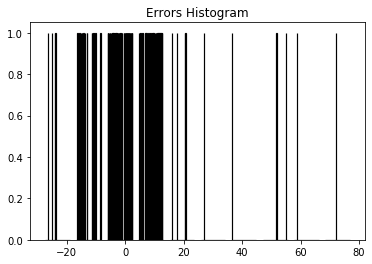

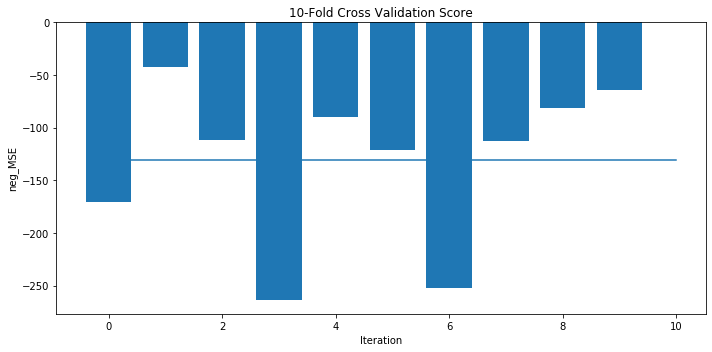

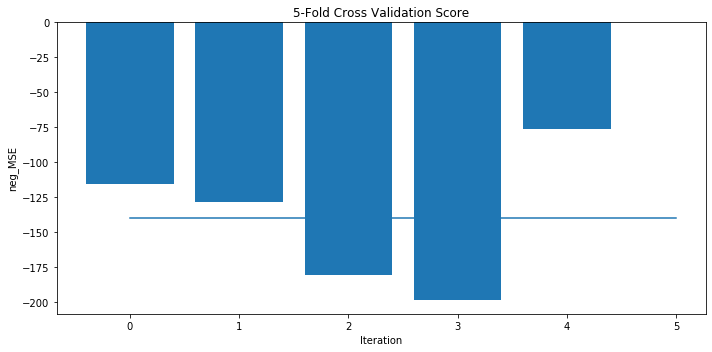

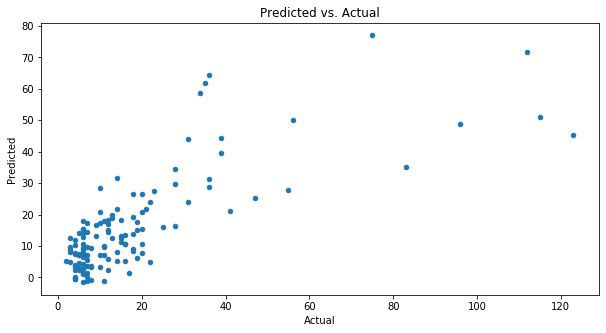

In [67]:
TheftOver_sklearn = linReg(X_train_3, y_train.iloc[:,[4]], X_test_3, y_test.iloc[:,[4]] )